## Metropolis Hastings

We will explore three different probability density functions, the first is 2-dim and bimodal, the other two are 10-dim and unimodal MVNs.

### Import Libraries

In [45]:
import numpy as np
import scipy
from scipy.stats import multivariate_normal
from matplotlib.collections import EllipseCollection
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### Functions

In [46]:
def pdf_bimodal(x):
    '''Bimodal pdf'''
    sigma1 = 1.0
    sigma2 = 0.5
    pdf = 0.5/(2*np.pi*sigma1**2)*np.exp(-0.5*((x-1.5)**2).sum()/sigma1**2)  +  0.5/(2*np.pi*sigma2**2)*np.exp(-0.5*((x+1.0)**2).sum()/sigma2**2)
    return pdf

def pdf_10dim_c2(x):
    '''10-dim MVN'''
    mu = np.zeros(10)
    corr = 0.2
    cov = np.eye(10, k = 0) + corr*np.eye(10, k = 1) + corr*np.eye(10, k = -1)
    pdf = scipy.stats.multivariate_normal.pdf(x, mu, cov)
    return pdf

def pdf_10dim_c5(x):
    '''10-dim MVN with stronger correlations'''
    mu = np.zeros(10)
    corr = 0.5
    cov = np.eye(10, k = 0) + corr*np.eye(10, k = 1) + corr*np.eye(10, k = -1)
    pdf = scipy.stats.multivariate_normal.pdf(x, mu, cov)
    return pdf

def MetropolisHastings(pdf, N, x_init, sigma):

  '''
  The proposal distribution is supposed to be a D=2 or D=10 dimensional isotropic Gaussian with variance σ^2.
  Given some pdf, the algorithm should produce and return a given number of chain points N, starting with some initial vector X_0. The result should be 
  returned as a NxD array. The algorithm should also evaluate and print the acceptance rate (fraction of accepted transitions over total number of steps).
  The algorithm is written such that it works for any dimensions of x_0.
  '''
  chain_points = []
  accep = 0
  for i in range(N):
    x_prime = np.random.normal(x_init,sigma)
    u = np.random.rand()
    r = min(1,pdf(x_prime)/pdf(x_init))   # if the proposed point is more probable than the previous one
    if u <= r :
      chain_points.append(x_prime) 
      x_init = x_prime
      accep += 1      
    else:
      chain_points.append(x_init) 
  return np.array(chain_points), accep/N


### Main Code

In [47]:
N = 20                                                                                # number of chain points N
D=2                                                                                   # for pdf_bimodal (D=2), pdf_10dim_c2 (D=10) ,pdf_10dim_c5 D(=10)
x_init = np.array(np.random.rand(D))               
sigma = 1                                                                            # variance
chain_points, accep_rate = MetropolisHastings(pdf_bimodal, N, x_init, sigma)         # select bewteen pdf_bimodal, pdf_10dim_c2 ,pdf_10dim_c5
print( 'Acceptence ratechain_points: {:.2f}'.format(accep_rate))
print(chain_points)                                                                 # NxD array

# Let's explore the above bimodal distribution (pdf_bimodal) for N=10000 and for five proposal widths in the range σ in [0.01, 100.]. Based on the acceptance
# rate and visual inspection of the result, we argue what parameters work here best. What are the problems with too low or too high values of σ?
# What happens when we start with initial values far away from the optimum. This initial phase is called "burn in phase".

Acceptence ratechain_points: 0.65
[[2.13790812 1.77210163]
 [2.13790812 1.77210163]
 [1.78754405 1.16094247]
 [1.78754405 1.16094247]
 [0.64440808 1.45654774]
 [0.64440808 1.45654774]
 [1.41242328 2.25908938]
 [1.41242328 2.25908938]
 [1.41242328 2.25908938]
 [1.82575163 1.27505119]
 [1.82575163 1.27505119]
 [1.82575163 1.27505119]
 [2.43096097 2.33947956]
 [2.84845701 1.76841158]
 [0.92203409 0.06783687]
 [1.58547547 0.54150307]
 [0.81495033 1.54684109]
 [2.65175847 1.52767391]
 [1.43223717 1.05963168]
 [1.02519623 0.57075421]]


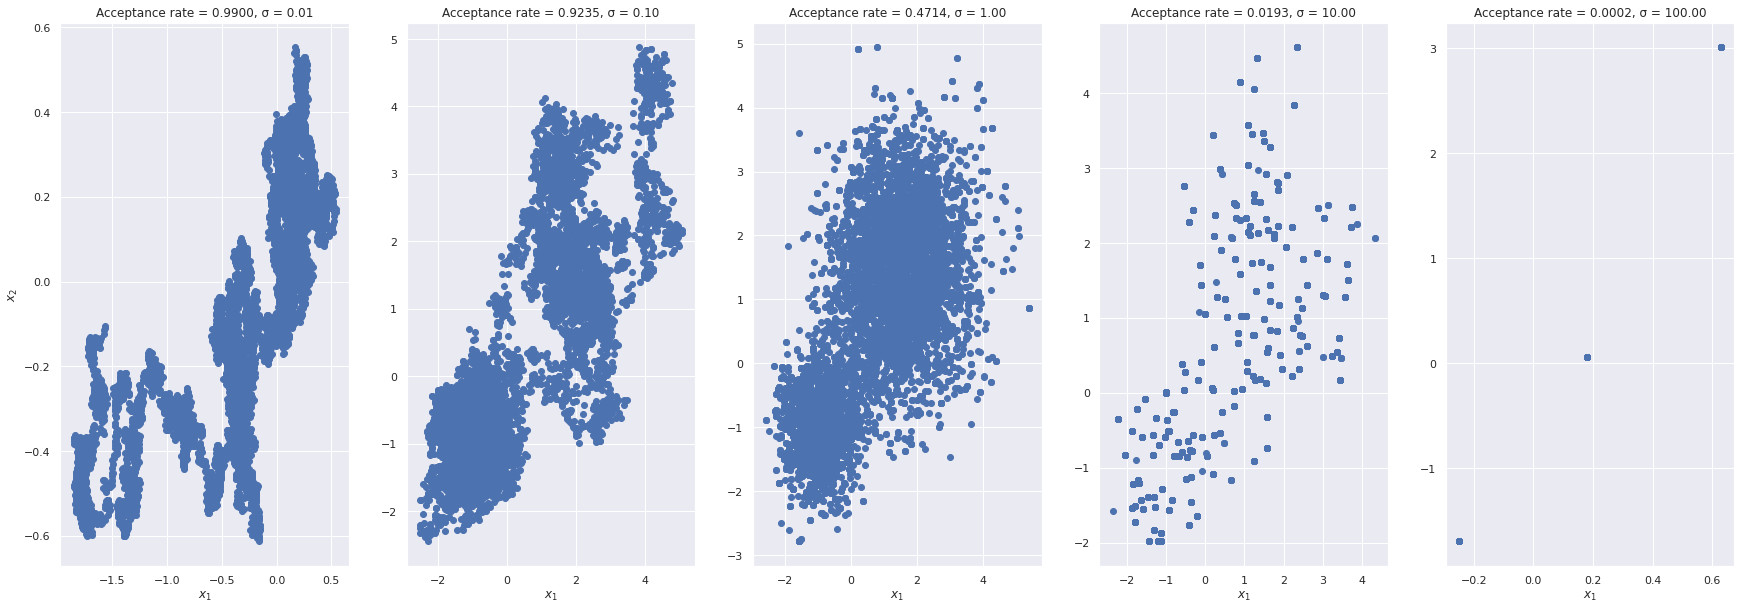

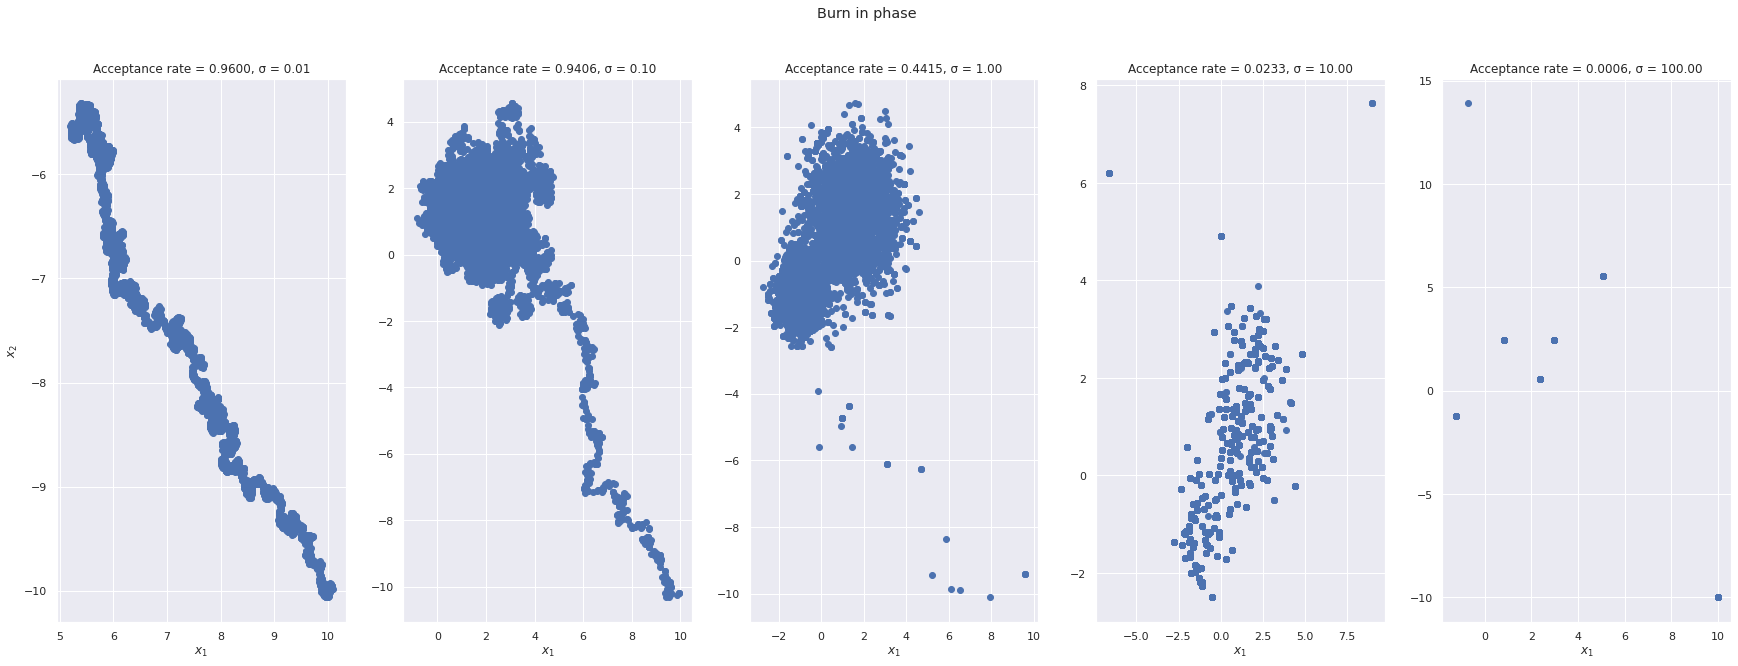

In [48]:
N = 10000
D=2
sigma =  [0.01,0.1,1,10,100] 

x_init = np.array(np.random.rand(D))
fig, ax = plt.subplots(1,5, figsize=(30,10))
for i,s in enumerate(sigma):
  vals, acc_rate = MetropolisHastings(pdf_bimodal, N, x_init, s)
  ax[i].scatter(vals[:,0],vals[:,1])
  ax[i].set_title('Acceptance rate = {:.4f}, σ = {:.2f}'.format(acc_rate,s))
  if i ==0:
    ax[i].set_ylabel(r'$x_2$')
  ax[i].set_xlabel(r'$x_1$')
plt.show()

x_init = np.array(np.array([10,-10]))
fig, ax = plt.subplots(1,5, figsize=(30,10))
for i,s in enumerate(sigma):
  vals, acc_rate = MetropolisHastings(pdf_bimodal, N, x_init, s)
  ax[i].scatter(vals[:,0],vals[:,1])
  ax[i].set_title('Acceptance rate = {:.4f}, σ = {:.2f}'.format(acc_rate,s))
  if i ==0:
    ax[i].set_ylabel(r'$x_2$')
  ax[i].set_xlabel(r'$x_1$')
fig.suptitle('Burn in phase')
plt.show()

Based on the acceptance rate and visual inspection of the result, the parameter that works best is $\sigma = 1$. We can also verify that by thinking that: 
An acceptance rate very close to $1$ means that the model accepts nearly every new 'jump' and we end up actually with a 'random walk'. On the other hand, an acceptance rate vary close to $0$ means we reject nearly every new 'jump' and we eventually not sampling. Hence, an acceptance rate of around $0.5$ considering also the visual inspection of the graphs seems to provide the best case of sampling.

We can clearly see that if it happens to start far away from the optimum the model will 'randomly walk' trying to find the true distribution and sample from it. Hence, the first samples will not actually be sampled from the true distribution. For a very low $\sigma$ the model may not sample from the true distribution in a given number of $N$ and a bigger number of steps must be provided.

Let's compare our results with the true distribution using 1-dim histograms (both in x_1 and x_2 direction).

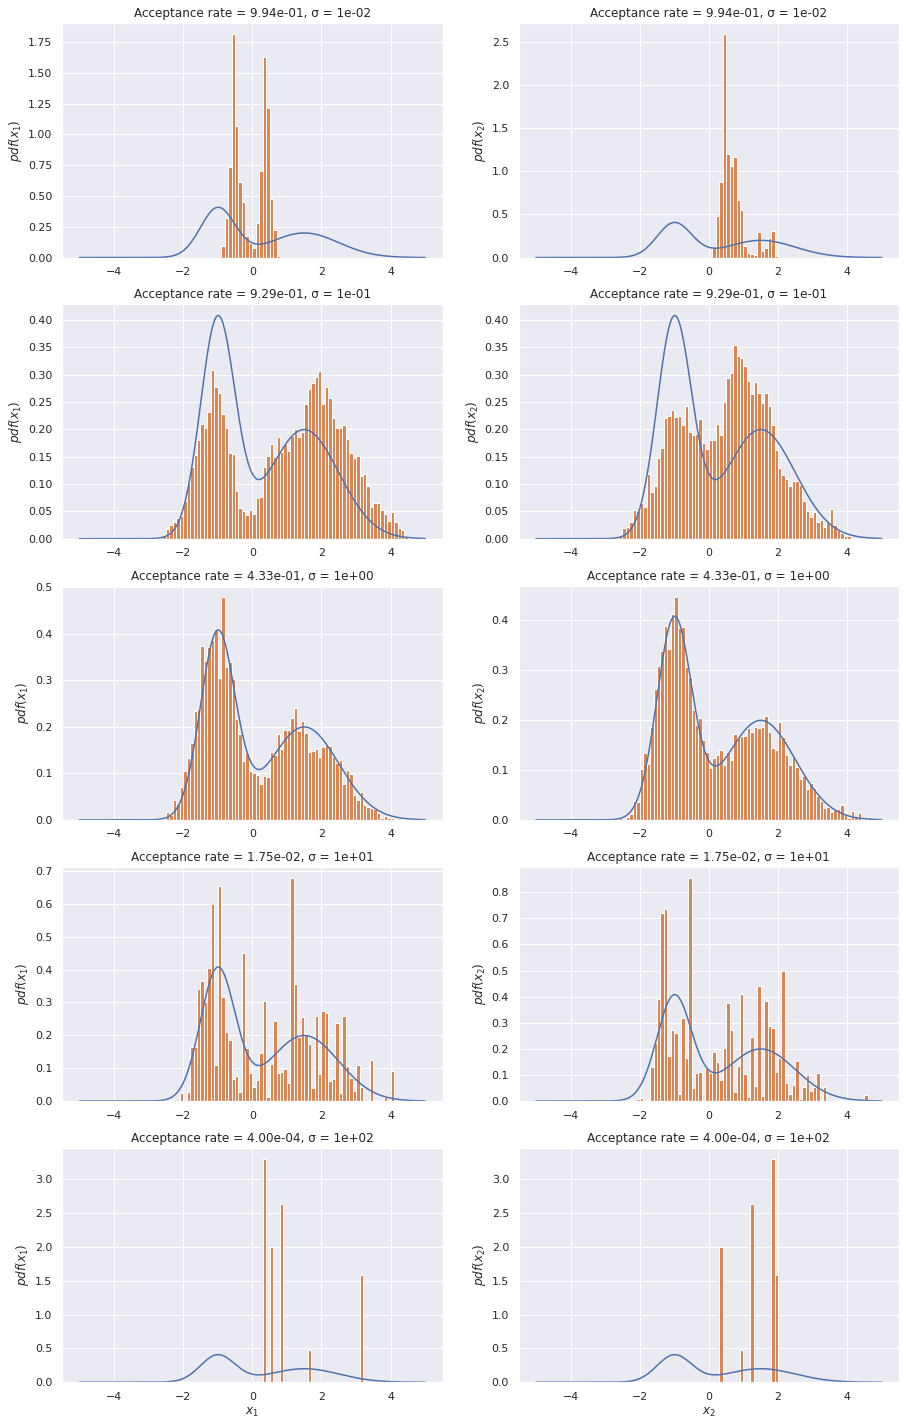

In [49]:
vals = np.arange(-5,5,8/N)
dvals = np.diff(vals)

pdf_x1 = np.array([np.sum(pdf_bimodal(np.array([i,vals]))*dvals[0]) for i in vals])
pdf_x2 = np.array([np.sum(pdf_bimodal(np.array([vals,i]))*dvals[0]) for i in vals])

N = 10000
D = 2
sigma =  [0.01,0.1,1,10,100] 
x_init = np.array(np.random.rand(D))

fig, ax = plt.subplots(5,2, figsize=(15,25))
for i,s in enumerate(sigma):
  chain_points, accep_rate = MetropolisHastings(pdf_bimodal, N, x_init, s)
  ax[i][0].plot(vals,pdf_x1)
  ax[i][0].hist(chain_points.T[0], bins=100, range=(-5,5),density = True)
  ax[i][1].plot(vals,pdf_x2)
  ax[i][1].hist(chain_points.T[1], bins=100, range=(-5,5), density = True)
  ax[i][0].set_ylabel(r'$pdf(x_1)$')
  ax[i][1].set_ylabel(r'$pdf(x_2)$')
  ax[i][0].set_title('Acceptance rate = {:.2e}, σ = {:.0e}'.format(accep_rate,s)) 
  ax[i][1].set_title('Acceptance rate = {:.2e}, σ = {:.0e}'.format(accep_rate,s))
  if i ==4:
    ax[i][0].set_xlabel(r'$x_1$')
    ax[i][1].set_xlabel(r'$x_2$')
plt.show()

The distribution can indeed be recovered for reasonable values of $\sigma$. As we see from the figure above (but also from the scatter plots of the previous question) we can approach the true distribution in case that $\sigma = 1$. For too low or too high values of $\sigma$ we verify the results of the previous question. More specificaly, in the first case even though we accept 'new jumps', we end up with a 'random walk' because we accept nearly all of them, hence we do not approach the true distribution. We can see that, from the hist-columns which do not correspond to the true distribution. On the other hand, in the second case we nearly reject all 'new jumps', thus we do not get new samples and it is clear from the plot where all of the hist-columns actually overlap giving us eventually 2 to 5 columns.

Let's consider now the 10-dim case.  We generate chains with 10000 steps, for initial values close to zero, and compare with the analytically expected result (a standard normal distribution).  

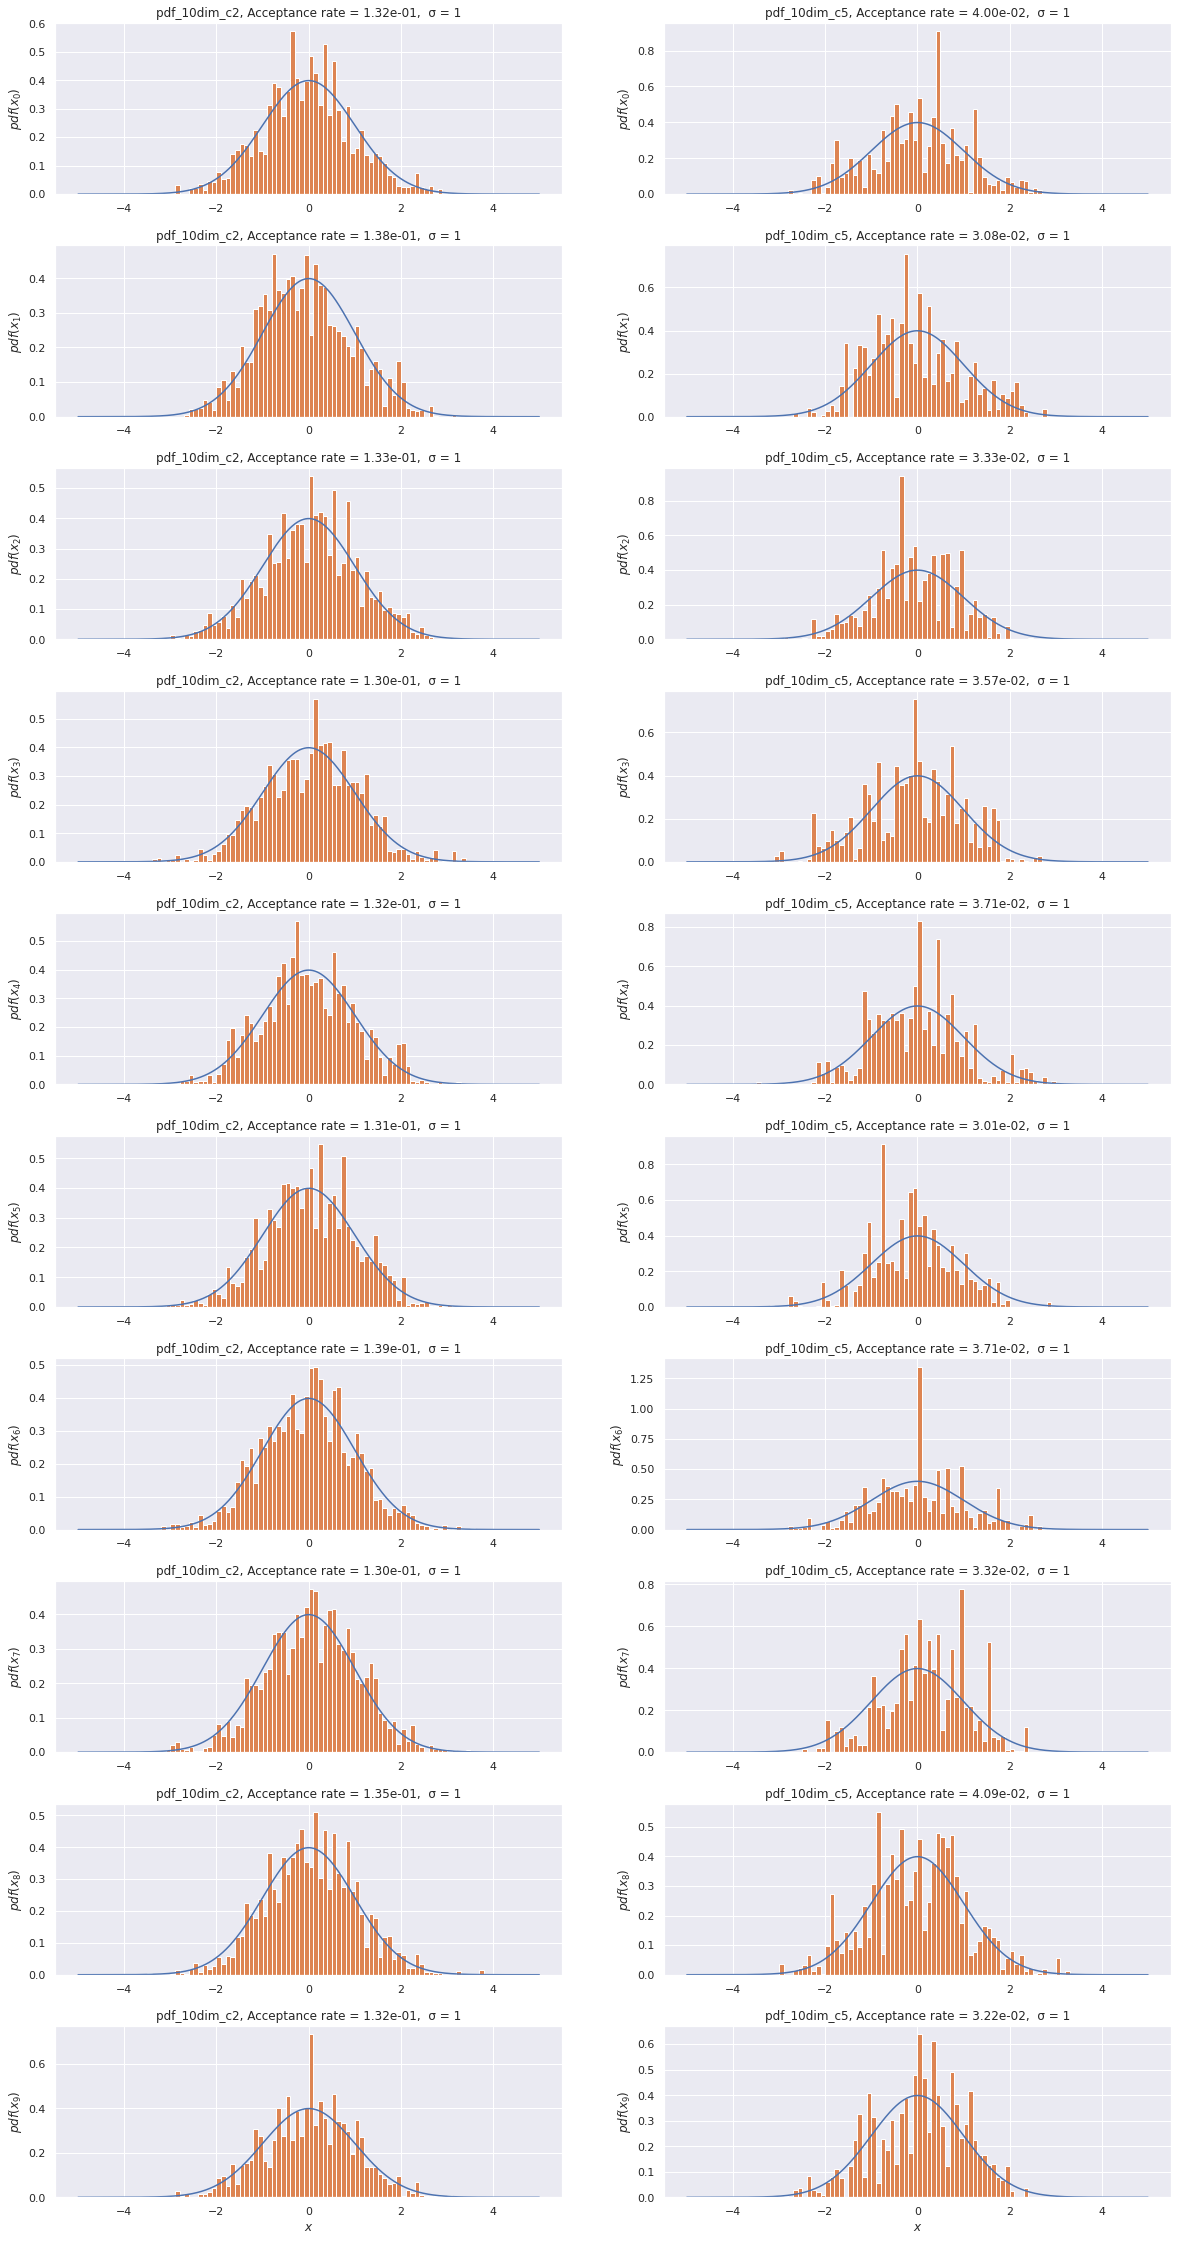

In [50]:
vals = np.arange(-5,5,8/N)
dvals = np.diff(vals)

pdf_x = scipy.stats.norm.pdf(vals,0,1)

N = 10000
D = 10
sigma =  1
x_init = np.zeros(10)

fig, ax = plt.subplots(10,2, figsize=(20,40))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(D):
  chain_points, accep_rate = MetropolisHastings(pdf_10dim_c2, N, x_init, sigma)
  ax[i][0].plot(vals,pdf_x)
  ax[i][0].hist(chain_points.T[i], bins=100, range=(-5,5),density = True)
  ax[i][0].set_ylabel(r'$pdf(x_{:.0f})$'.format(i))
  ax[i][0].set_title('pdf_10dim_c2, Acceptance rate = {:.2e},  σ = {:.0f}'.format(accep_rate, sigma))
  chain_points, accep_rate = MetropolisHastings(pdf_10dim_c5, N, x_init, sigma)
  ax[i][1].plot(vals,pdf_x)
  ax[i][1].hist(chain_points.T[i], bins=100, range=(-5,5), density = True)
  ax[i][1].set_ylabel(r'$pdf(x_{:.0f})$'.format(i))
  ax[i][1].set_title('pdf_10dim_c5, Acceptance rate = {:.2e},  σ = {:.0f}'.format(accep_rate, sigma))  
  if i ==9:
    ax[i][0].set_xlabel(r'$x$')
    ax[i][1].set_xlabel(r'$x$')
plt.show()

As we move from 2 to 10 dimensions the acceptance rate becomes lower because the 'new jump' can now take place to more directions, thus the probability of randomly finding the correct one (via the criteria that we implemented in the code) becomes smaller. In case now that the data is strongly correlated the target distribution from which we try to sample will be more squeezed due to correlations between different dimensions (easy to visualize for a bimodal, impossible for a 10-D ND), thus the area towards we want to 'jump' is smaller. Hence, it is more difficult for the model to accept a new jump.